<a href="https://colab.research.google.com/github/nibaskumar93n-debug/Morphoinformatics/blob/main/6_Introduction_to_Machine_Learning_Skill_Morph_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


# **Introduction**

In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [16]:
print("Reading the real cancer dataset...")
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Breast_Cancer_Wisconsin_Dataset.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean','smoothness_mean','perimeter_mean','compactness_mean','concavity_mean','symmetry_mean']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Reading the real cancer dataset...
Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean  smoothness_mean  \
0    842302         M        17.99         10.38     1001.0          0.11840   
1    842517         M        20.57         17.77     1326.0          0.08474   
2  84300903         M        19.69         21.25     1203.0          0.10960   
3  84348301         M        11.42         20.38      386.1          0.14250   
4  84358402         M        20.29         14.34     1297.0          0.10030   

   perimeter_mean  compactness_mean  concavity_mean  symmetry_mean  
0          122.80           0.27760          0.3001         0.2419  
1          132.90           0.07864          0.0869         0.1812  
2          130.00           0.15990          0.1974         0.2069  
3           77.58           0.28390          0.2414         0.2597  
4          1

# **Prepare Data**

In [17]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'area_mean',        # Area of tumor
    'smoothness_mean',  # How smooth the surface is
    'compactness_mean',
    'smoothness_mean',
    'perimeter_mean',
    'compactness_mean',
    'concavity_mean',
    'symmetry_mean'
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 10)
y (diagnosis): (569,)


# **Train and Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean  \
412        9.397         21.68      268.8          0.07969           0.06053   
461       27.420         26.27     2501.0          0.10840           0.19880   
532       13.680         16.33      575.5          0.09277           0.07255   
495       14.870         20.21      680.9          0.09587           0.08345   
13        15.850         23.95      782.7          0.08401           0.10020   

     smoothness_mean  perimeter_mean  compactness_mean  concavity_mean  \
412          0.07969           59.75           0.06053         0.03735   
461          0.10840          186.90           0.19880         0.36350   
532          0.09277           87.76           0.07255         0.01752   
495          0.09587           96.12           0.08345     

# **Train with Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Candidate depths
depths = [3, 4, 5]

best_depth = None
best_acc = 0

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=20)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Depth={depth} → Test Accuracy: {acc:.3f}")

    if acc > best_acc:
        best_acc = acc
        best_depth = depth

print(f"\n Best depth = {best_depth} with accuracy = {best_acc:.3f}")




Depth=3 → Test Accuracy: 0.939
Depth=4 → Test Accuracy: 0.947
Depth=5 → Test Accuracy: 0.947

 Best depth = 4 with accuracy = 0.947


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=20)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")


Precision: 0.938
Recall:    0.938
F1-score:  0.938


# **Test our Skill Morph Doctor**

In [21]:
from sklearn.metrics import accuracy_score

print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!\n")

# Make predictions
predictions = best_model.predict(X_test)
prediction_probabilities = best_model.predict_proba(X_test)[:, 1]  # Probability of malignant (class=1)

print("Skill Morph doctor made predictions for all test patients!")
print("Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show detailed predictions with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Predicted             | Confidence | Correct?")
print("-" * 75)

for i in range(min(10, len(X_test))):  # show up to 10 patients
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:19} | {confidence:8.1f}%  | {correct}")


Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!

Skill Morph doctor made predictions for all test patients!
Note: We also got probability scores (confidence levels) for each prediction!

Skill Morph Doctor Accuracy: 0.947 (94.7%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Predicted             | Confidence | Correct?
---------------------------------------------------------------------------
      1 | Benign      | Benign              |     80.0%  | ✅
      2 | Malignant   | Malignant           |     94.1%  | ✅
      3 | Malignant   | Malignant           |    100.0%  | ✅
      4 | Benign      | Benign              |     90.7%  | ✅
      5 | Malignant   | Malignant           |     78.6%  | ✅
      6 | Malignant   | Malignant           |    100.0%  | ✅
      7 | Malignant   | Malignant           |    100.0%  | ✅
      8 | Benign      | Benign              |     90.7% 

# Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[63  3]
 [ 3 45]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     63        3   ← 3 False Alarms (predicted malignant but was benign)
Real Malignant  3        45   ← 3 Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: 108
❌ Wrong Predictions: 6

⚠️ DANGER: Missing malignant cancer (3 cases) is more dangerous than false alarms (3 cases)



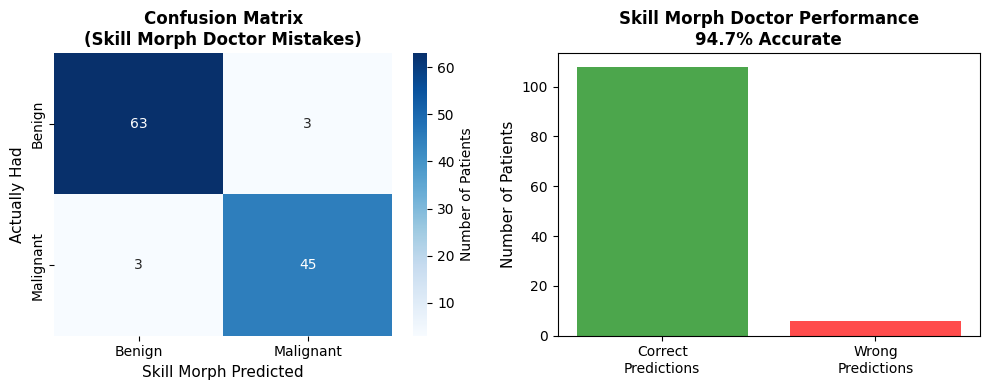

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← {cm[0,1]} False Alarms (predicted malignant but was benign)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← {cm[1,0]} Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# --- Visualization ---
plt.figure(figsize=(10, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy Bar Chart
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate',
          fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()



# **Detailed Performance**

 MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers



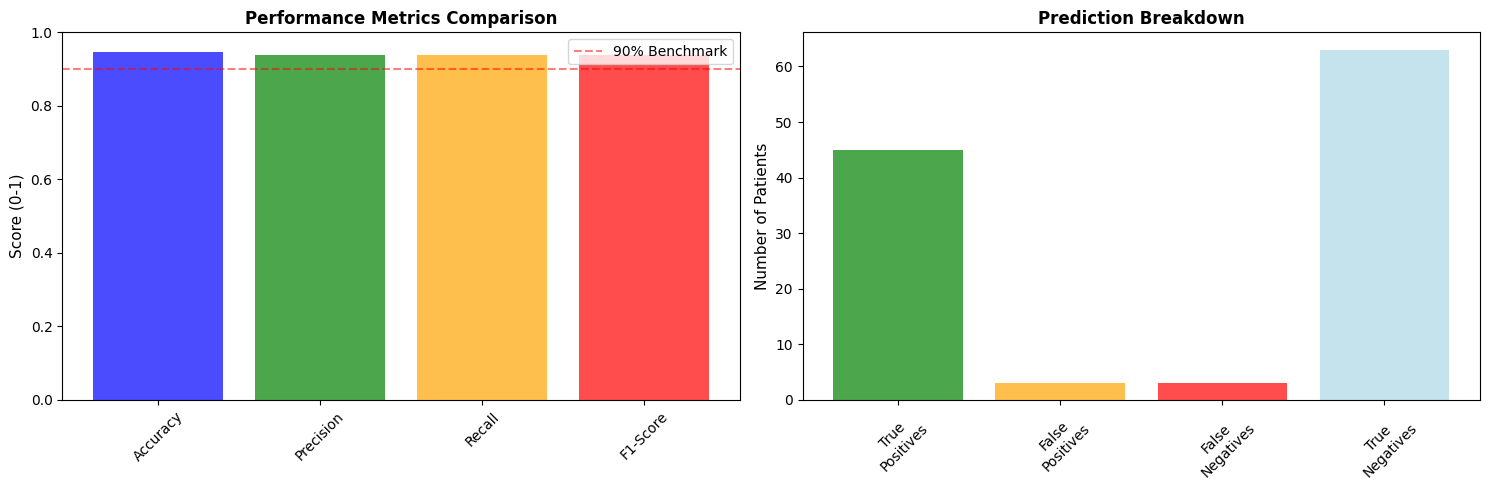

In [23]:
print(""" MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers
""")

# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC CURVE & AUC - ADVANCED EVALUATION


 STEP 9: ROC Curve & AUC - The Ultimate Evaluation

ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve


OUR SKILL MORPH DOCTOR AUC SCORE:
AUC Score: 0.9530 (95.30%)


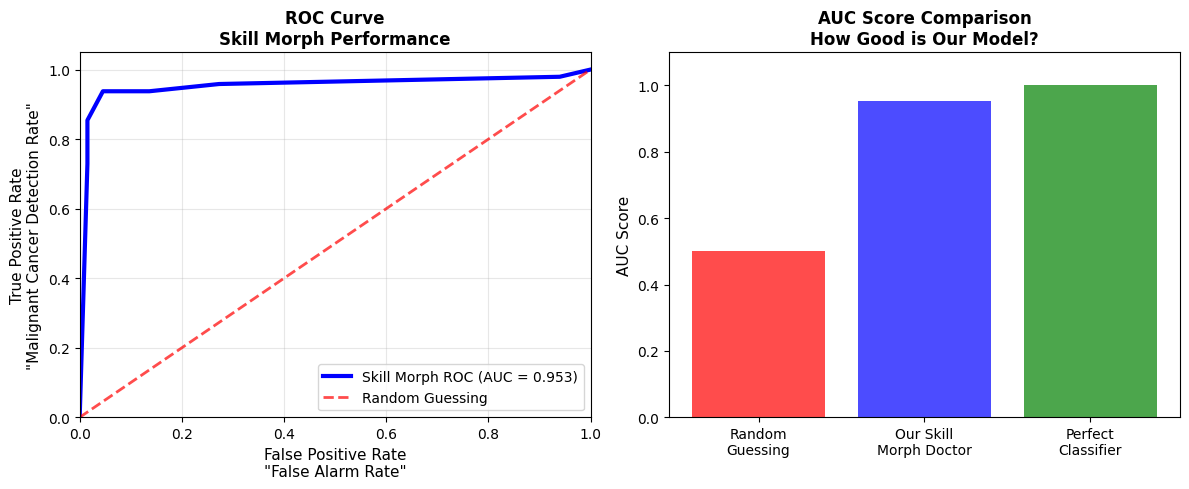

In [24]:
print("\n STEP 9: ROC Curve & AUC - The Ultimate Evaluation")
print("=" * 60)

print("""
ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve

""")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"OUR SKILL MORPH DOCTOR AUC SCORE:")
print(f"{'='*40}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


Assignment